# Miami Grand Prix
The Miami Grand Prix is a Formula One Grand Prix which was held for the first time during the 2022 season, with the event taking place at the Miami International Autodrome on a ten-year contract. 

In [93]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## A little recap about what happened last year
Before to know what will happen in the grand prix, I consider that is neccesary to get to know what happened last year in order to have a reference to know what will happen this year in Miami.
In this case, I decided to take qualyfing and race as a reference to try to predict with the data obtained in the free practice how the weekend will unfold.

In [94]:
response = urlopen("https://api.openf1.org/v1/sessions?year=2023&country_code=USA&circuit_short_name=Miami")
data = json.loads(response.read().decode('utf-8'))
calendar = pd.DataFrame(data)
calendar

,location,country_key,country_code,country_name,circuit_key,circuit_short_name,session_type,session_name,date_start,date_end,gmt_offset,session_key,meeting_key,year
0,Miami,19,USA,United States,151,Miami,Practice,Practice 1,2023-05-05T18:00:00+00:00,2023-05-05T19:00:00+00:00,-04:00:00,9071,1208,2023
1,Miami,19,USA,United States,151,Miami,Practice,Practice 2,2023-05-05T21:30:00+00:00,2023-05-05T22:30:00+00:00,-04:00:00,9072,1208,2023
2,Miami,19,USA,United States,151,Miami,Practice,Practice 3,2023-05-06T16:30:00+00:00,2023-05-06T17:30:00+00:00,-04:00:00,9073,1208,2023
3,Miami,19,USA,United States,151,Miami,Qualifying,Qualifying,2023-05-06T20:00:00+00:00,2023-05-06T21:00:00+00:00,-04:00:00,9074,1208,2023
4,Miami,19,USA,United States,151,Miami,Race,Race,2023-05-07T19:30:00+00:00,2023-05-07T21:30:00+00:00,-04:00:00,9078,1208,2023


In [95]:
country_key='country_key=19'
country_code="country_code='USA'"
circuit_key='circuit_key=151'
year = 'year=2024'

### Qualyfing
In qualyfing,I will obtain the data related at the fastest driver on track to take as a reference his time and also his car data(RPM,speed,etc). With these data, it can see which gear will be used or at which speed a turn is taken.

In [96]:
session_key='session_key=9074'
url = 'https://api.openf1.org/v1/laps?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
qualyfing = pd.DataFrame(data)
qualyfing.query("is_pit_out_lap== False")

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
16,1208,9074,23,216,184.0,338.0,2023-05-06T20:01:50.246000+00:00,90.967,False,31.047,34.427,25.493,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2051, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",2
17,1208,9074,2,167,153.0,292.0,2023-05-06T20:02:00.746000+00:00,123.876,False,48.318,43.388,32.170,"[2049, 2049, 2049, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",2
18,1208,9074,24,219,189.0,332.0,2023-05-06T20:02:05.042000+00:00,90.162,False,30.449,34.235,25.478,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",2
19,1208,9074,77,222,191.0,332.0,2023-05-06T20:02:09.495000+00:00,89.964,False,30.501,34.138,25.325,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2051, 2049, 2049, 2049, 2049, 2049, 2051, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",2
20,1208,9074,22,219,188.0,333.0,2023-05-06T20:02:15.917000+00:00,90.117,False,30.545,34.221,25.351,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1208,9074,20,194,173.0,285.0,2023-05-06T20:52:23.629000+00:00,104.994,False,35.208,37.125,32.661,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",18
290,1208,9074,16,199,178.0,302.0,2023-05-06T20:52:39.067000+00:00,104.964,False,35.819,37.057,32.088,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",17
291,1208,9074,55,177,170.0,253.0,2023-05-06T20:52:44.988000+00:00,113.182,False,38.317,40.602,34.263,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",16
302,1208,9074,55,156,NaN,NaN,2023-05-06T20:57:44.389000+00:00,NaN,False,33.154,NaN,NaN,"[2048, 2048, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],18


In [97]:
qualyfing.query("date_start > '2023-05-06T20:45:23.629000'").loc[qualyfing.query("date_start > '2023-05-06T20:45:23.629000'")['lap_duration'].idxmin()]

meeting_key                                                       1208
session_key                                                       9074
driver_number                                                       11
i1_speed                                                           223
i2_speed                                                         195.0
st_speed                                                         340.0
date_start                            2023-05-06T20:50:13.991000+00:00
lap_duration                                                    86.841
is_pit_out_lap                                                   False
duration_sector_1                                               28.942
duration_sector_2                                               33.049
duration_sector_3                                                24.85
segments_sector_1    [2051, 2049, 2049, 2051, 2051, 2049, 2049, 205...
segments_sector_2    [2051, 2049, 2049, 2051, 2049, 2049, 2051, 205...
segmen

In [98]:
from datetime import datetime, timedelta
startfastestlap = datetime(2023,5,6,20,50,13,99100)
startfastestlap+timedelta(seconds=86.841)

datetime.datetime(2023, 5, 6, 20, 51, 39, 940100)

To obtain a clean analysis, seconds within his fastest lap will be taken to know how develop the car when it is in its maxium performance.

In [99]:
driver_number='&driver_number=11'
url = "https://api.openf1.org/v1/car_data?"

urltotal = url+session_key+driver_number

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
fastestCarOnTrackData = pd.DataFrame(data)
fastestCarOnTrackData= fastestCarOnTrackData.query("date>='2023-05-06T20:50:13.991000' and date <= '2023-05-06T20:51:39.940100'").reset_index()

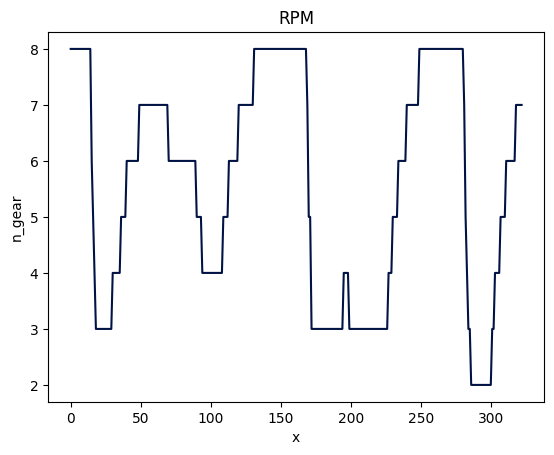

In [100]:
plt.plot(fastestCarOnTrackData.index, fastestCarOnTrackData.n_gear,color="#001344")
plt.title("RPM")
plt.xlabel("x")
plt.ylabel("n_gear")
plt.show()

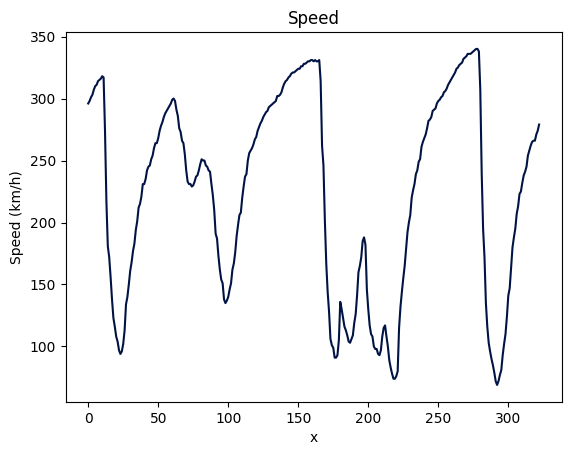

In [101]:
plt.plot(fastestCarOnTrackData.index, fastestCarOnTrackData.speed,color="#001344")
plt.title("Speed")
plt.xlabel("x")
plt.ylabel("Speed (km/h)")
plt.show()

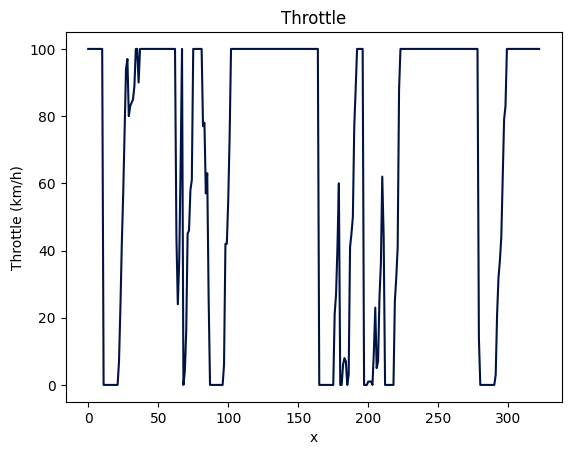

In [102]:
plt.plot(fastestCarOnTrackData.index, fastestCarOnTrackData.throttle,color="#001344")
plt.title("Throttle")
plt.xlabel("x")
plt.ylabel("Throttle (km/h)")
plt.show()


## Race
Some things that it could be interesting to take into account it could be the time spent in the box stops and the race pace in each sector to compare with the data obtained in the race.

In [103]:
session_key='session_key=9078'
url = 'https://api.openf1.org/v1/laps?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
race = pd.DataFrame(data)
race

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1208,9078,1,212.0,186,306,None,NaN,False,NaN,36.216,26.263,"[2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2049, 2049, 2048, 0]",1
1,1208,9078,2,202.0,183,272,None,NaN,False,NaN,38.209,26.488,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2051, 2049, 2049, 2049, 204...","[2048, 2048, 2049, 2049, 2049, 2048, 2064]",1
2,1208,9078,4,202.0,184,266,None,NaN,False,NaN,38.745,NaN,"[2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2049, 2048, 2049, 2048, 0]",1
3,1208,9078,10,213.0,184,299,None,NaN,False,NaN,35.744,26.425,"[2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2048, 2049, 2049, 2049, 2049, 2049]",1
4,1208,9078,11,212.0,186,297,None,NaN,False,NaN,35.141,26.229,"[2064, 2049, 2051, 2051, 2049, 2051, 2051, 204...","[2049, 2049, 2049, 2049, 2049, 2051, 2051, 205...","[2048, 2048, 2049, 2048, 2048, 2048, 0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1208,9078,31,216.0,188,309,2023-05-07T21:00:52.858000+00:00,91.429,False,30.862,34.838,25.729,"[None, 2048, 2048, 2048, 2048, 2049, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57
1134,1208,9078,44,214.0,189,317,2023-05-07T21:00:46.749000+00:00,90.669,False,30.349,34.629,25.691,"[None, 2049, 2048, 2048, 2048, 2049, 2051, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57
1135,1208,9078,55,217.0,191,318,2023-05-07T21:00:32.233000+00:00,91.463,False,31.046,34.781,25.636,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57
1136,1208,9078,63,216.0,189,316,2023-05-07T21:00:28.483000+00:00,91.015,False,30.739,34.683,25.593,"[None, 2048, 2048, 2048, 2048, 2049, 2048, 204...","[2049, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57


In [104]:
# Name of the drivers
url = 'https://api.openf1.org/v1/drivers?'
# In this case, due to Open URL does not refresh well the feature drivers, I will catch Practice 1 drivers as a reference.
#session_key = 'session_key=9472'
urltotal = url+session_key

response = urlopen(urltotal)
drivers = json.loads(response.read().decode('utf-8'))
drivers = pd.DataFrame(drivers)
# Restore the session key
#session_key='session_key=9481'
drivers

,driver_number,broadcast_name,full_name,name_acronym,team_name,team_colour,first_name,last_name,headshot_url,country_code,session_key,meeting_key
0,1,M VERSTAPPEN,Max VERSTAPPEN,VER,Red Bull Racing,3671C6,Max,Verstappen,https://www.formula1.com/content/dam/fom-websi...,NED,9078,1208
1,2,L SARGEANT,Logan SARGEANT,SAR,Williams,37BEDD,Logan,Sargeant,https://www.formula1.com/content/dam/fom-websi...,USA,9078,1208
2,4,L NORRIS,Lando NORRIS,NOR,McLaren,F58020,Lando,Norris,https://www.formula1.com/content/dam/fom-websi...,GBR,9078,1208
3,10,P GASLY,Pierre GASLY,GAS,Alpine,2293D1,Pierre,Gasly,https://www.formula1.com/content/dam/fom-websi...,FRA,9078,1208
4,11,S PEREZ,Sergio PEREZ,PER,Red Bull Racing,3671C6,Sergio,Perez,https://www.formula1.com/content/dam/fom-websi...,MEX,9078,1208
5,14,F ALONSO,Fernando ALONSO,ALO,Aston Martin,358C75,Fernando,Alonso,https://www.formula1.com/content/dam/fom-websi...,ESP,9078,1208
6,16,C LECLERC,Charles LECLERC,LEC,Ferrari,F91536,Charles,Leclerc,https://www.formula1.com/content/dam/fom-websi...,MON,9078,1208
7,18,L STROLL,Lance STROLL,STR,Aston Martin,358C75,Lance,Stroll,https://www.formula1.com/content/dam/fom-websi...,CAN,9078,1208
8,20,K MAGNUSSEN,Kevin MAGNUSSEN,MAG,Haas F1 Team,B6BABD,Kevin,Magnussen,https://www.formula1.com/content/dam/fom-websi...,DEN,9078,1208
9,21,N DE VRIES,Nyck DE VRIES,DEV,AlphaTauri,5E8FAA,Nyck,De Vries,https://www.formula1.com/content/dam/fom-websi...,NED,9078,1208


### Pits

In [105]:
session_key='session_key=9078'
url = 'https://api.openf1.org/v1/pit?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
pits = pd.DataFrame(data)
pits

""


### Stints

In [106]:
url = 'https://api.openf1.org/v1/stints?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
stintInformation = pd.DataFrame(data)
stintInformation

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1208,9078,1,2,1,2,MEDIUM,0
1,1208,9078,1,4,1,4,SOFT,0
2,1208,9078,1,81,1,5,SOFT,0
3,1208,9078,1,20,1,14,MEDIUM,0
4,1208,9078,1,10,1,15,MEDIUM,0
5,1208,9078,1,21,1,15,MEDIUM,0
6,1208,9078,1,77,1,15,MEDIUM,0
7,1208,9078,1,16,1,17,MEDIUM,0
8,1208,9078,1,63,1,17,MEDIUM,0
9,1208,9078,1,55,1,18,MEDIUM,0


In [107]:
def stint_configuration(stintInformation):
    stintsDataFrame = pd.DataFrame()
    for index,row in stintInformation.iterrows():
        number_driver = row.driver_number
        acronym_driver = drivers.query('driver_number == @number_driver').name_acronym.to_string(index=False)
        full_name = drivers.query('driver_number == @number_driver').full_name.to_string(index=False)
        team_name = drivers.query('driver_number == @number_driver').team_name.to_string(index=False)
        if row.lap_start != row.lap_end:
            contador = row.lap_start
            while contador <=row.lap_end :
                new_row = {'driver_number':row.driver_number,'compound':row.compound,'lap_number':contador,'name_acronym':acronym_driver,'full_name':full_name,'team_name':team_name}
                stintsDataFrame = pd.concat([stintsDataFrame, pd.DataFrame([new_row])], ignore_index=True)
                contador+=1
        else:
        
            new_row = {'driver_number':row.driver_number,'compound':row.compound,'lap_number':row.lap_start,'name_acronym':acronym_driver,'full_name':full_name,'team_name':team_name}
            stintsDataFrame =pd.concat([stintsDataFrame, pd.DataFrame([new_row])], ignore_index=True)
    return stintsDataFrame

In [108]:
stintsDataFrame =stint_configuration(stintInformation)
jointables2 = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1208,9078,1,212.0,186,306,None,NaN,False,NaN,36.216,26.263,"[2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2049, 2049, 2048, 0]",1,HARD,VER,Max VERSTAPPEN,Red Bull Racing
1,1208,9078,2,202.0,183,272,None,NaN,False,NaN,38.209,26.488,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2051, 2049, 2049, 2049, 204...","[2048, 2048, 2049, 2049, 2049, 2048, 2064]",1,MEDIUM,SAR,Logan SARGEANT,Williams
2,1208,9078,4,202.0,184,266,None,NaN,False,NaN,38.745,NaN,"[2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2049, 2048, 2049, 2048, 0]",1,SOFT,NOR,Lando NORRIS,McLaren
3,1208,9078,10,213.0,184,299,None,NaN,False,NaN,35.744,26.425,"[2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2048, 2049, 2049, 2049, 2049, 2049]",1,MEDIUM,GAS,Pierre GASLY,Alpine
4,1208,9078,11,212.0,186,297,None,NaN,False,NaN,35.141,26.229,"[2064, 2049, 2051, 2051, 2049, 2051, 2051, 204...","[2049, 2049, 2049, 2049, 2049, 2051, 2051, 205...","[2048, 2048, 2049, 2048, 2048, 2048, 0]",1,MEDIUM,PER,Sergio PEREZ,Red Bull Racing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1208,9078,31,216.0,188,309,2023-05-07T21:00:52.858000+00:00,91.429,False,30.862,34.838,25.729,"[None, 2048, 2048, 2048, 2048, 2049, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57,MEDIUM,OCO,Esteban OCON,Alpine
1134,1208,9078,44,214.0,189,317,2023-05-07T21:00:46.749000+00:00,90.669,False,30.349,34.629,25.691,"[None, 2049, 2048, 2048, 2048, 2049, 2051, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57,MEDIUM,HAM,Lewis HAMILTON,Mercedes
1135,1208,9078,55,217.0,191,318,2023-05-07T21:00:32.233000+00:00,91.463,False,31.046,34.781,25.636,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57,HARD,SAI,Carlos SAINZ,Ferrari
1136,1208,9078,63,216.0,189,316,2023-05-07T21:00:28.483000+00:00,91.015,False,30.739,34.683,25.593,"[None, 2048, 2048, 2048, 2048, 2049, 2048, 204...","[2049, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57,HARD,RUS,George RUSSELL,Mercedes


### Fastest lap per compound

In [109]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
1124,1208,9078,14,216.0,189,321,2023-05-07T21:00:22.124000+00:00,90.519,False,30.435,34.583,25.501,"[None, 2048, 2048, 2049, 2049, 2049, 2049, 205...","[2049, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",57,HARD,ALO,Fernando ALONSO,Aston Martin
1100,1208,9078,1,NaN,191,324,2023-05-07T20:58:26.282000+00:00,89.708,False,30.233,34.098,25.377,"[None, 2048, 2048, 2049, 2051, 2051, 2048, 204...","[2049, 2049, 2048, 2048, 2048, 2049, 2048, 204...","[2049, 2048, 2048, 2048, 2048, 2048, 0]",56,MEDIUM,VER,Max VERSTAPPEN,Red Bull Racing
42,1208,9078,4,210.0,185,280,2023-05-07T19:37:11.258000+00:00,93.869,False,32.114,35.502,26.253,"[2048, 2049, 2049, 2049, 2048, 2049, 2049, 204...","[2048, 2048, 2049, 2049, 2049, 2048, 2049, 204...","[2048, 2049, 2049, 2049, 2048, 2048, 2064]",3,SOFT,NOR,Lando NORRIS,McLaren


### Sector 1

In [110]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

,duration_sector_1
team_name,
Red Bull Racing,31.216704
Mercedes,31.523111
Aston Martin,31.561626
Ferrari,31.624157
McLaren,31.652475
Alpine,31.655290
Alfa Romeo,31.667623
Haas F1 Team,31.681654
AlphaTauri,31.711132


### Sector 2

In [111]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

,duration_sector_2
team_name,
Red Bull Racing,34.860787
Mercedes,35.093806
Ferrari,35.116278
Aston Martin,35.176336
Alpine,35.200673
Williams,35.256123
AlphaTauri,35.282415
Alfa Romeo,35.329255
Haas F1 Team,35.329617


### Sector 3

In [112]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

,duration_sector_3
team_name,
Red Bull Racing,25.749204
Aston Martin,25.787234
Ferrari,25.840880
Mercedes,25.871259
Haas F1 Team,25.894252
Alpine,25.895701
AlphaTauri,25.952887
Alfa Romeo,25.970160
Williams,26.022547


In [113]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
MEDIUM,92.661014
HARD,92.763436
SOFT,93.926667


# FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX
First of all it is neccesary to obtain all the data of the 2024 sessions in order to obtain some data as session_key,country_key,country_code and circuit_key

In [114]:
response = urlopen("https://api.openf1.org/v1/sessions?year=2024&country_code=USA&circuit_short_name=Miami")
data = json.loads(response.read().decode('utf-8'))
calendar = pd.DataFrame(data)
calendar

,session_key,session_name,date_start,date_end,gmt_offset,session_type,meeting_key,location,country_key,country_code,country_name,circuit_key,circuit_short_name,year
0,9497,Practice 1,2024-05-03T16:30:00+00:00,2024-05-03T17:30:00+00:00,-04:00:00,Practice,1234,Miami,19,USA,United States,151,Miami,2024


## Setup

In [115]:
session_key='session_key=9497'
country_key='country_key=19'
country_code="country_code='USA'"
circuit_key='circuit_key=151'
year = 'year=2024'

## Free Practice 1

In [116]:
url = 'https://api.openf1.org/v1/laps?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
practice1 = pd.DataFrame(data)
practice1

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1234,9497,20,204.0,175.0,307.0,2024-05-03T16:30:02.658000+00:00,NaN,True,NaN,37.730,27.186,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2051, 2049, 2049, 2049, 2049, 2051, 2049, 205...","[2051, 2049, 2051, 2049, 2051, 2049, 0]",1
1,1234,9497,31,197.0,147.0,286.0,2024-05-03T16:30:06.896000+00:00,NaN,True,NaN,40.554,28.801,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2051, 2049, 2051, 2049, 2049, 0]",1
2,1234,9497,81,196.0,87.0,144.0,2024-05-03T16:30:10.445000+00:00,NaN,True,NaN,41.754,32.018,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2051, 2048, 2049]",1
3,1234,9497,4,173.0,132.0,292.0,2024-05-03T16:30:21.335000+00:00,NaN,True,NaN,41.737,34.479,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2049, 2049]",1
4,1234,9497,10,199.0,164.0,275.0,2024-05-03T16:30:24.612000+00:00,NaN,True,NaN,38.336,28.832,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 205...","[2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,1234,9497,81,169.0,145.0,196.0,2024-05-03T17:33:36.162000+00:00,140.311,False,61.548,42.331,36.432,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],24
459,1234,9497,4,214.0,140.0,225.0,2024-05-03T17:33:44.937000+00:00,144.745,False,59.782,45.996,38.967,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],21
460,1234,9497,24,210.0,158.0,134.0,2024-05-03T17:33:48.274000+00:00,140.400,False,52.957,43.906,43.537,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],24
461,1234,9497,22,169.0,152.0,248.0,2024-05-03T17:33:49.428000+00:00,142.068,False,59.837,47.976,34.255,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],25


In [117]:
#Stints
url = 'https://api.openf1.org/v1/stints?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
stintInformation = pd.DataFrame(data)
stintInformation

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1234,9497,1,4,1,2,HARD,0
1,1234,9497,1,14,1,2,MEDIUM,0
2,1234,9497,1,18,1,2,MEDIUM,0
3,1234,9497,1,2,1,3,HARD,0
4,1234,9497,1,16,1,4,HARD,0
...,...,...,...,...,...,...,...,...
77,1234,9497,5,11,22,24,MEDIUM,17
78,1234,9497,4,1,22,26,SOFT,3
79,1234,9497,4,23,23,25,HARD,13
80,1234,9497,6,44,23,25,MEDIUM,18


In [118]:
# Name of the drivers
url = 'https://api.openf1.org/v1/drivers?'
# In this case, due to Open URL does not refresh well the feature drivers, I will catch Practice 1 drivers as a reference.
#session_key = 'session_key=9472'
urltotal = url+session_key

response = urlopen(urltotal)
drivers = json.loads(response.read().decode('utf-8'))
drivers = pd.DataFrame(drivers)
# Restore the session key
#session_key='session_key=9481'
drivers

,session_key,meeting_key,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,driver_number,team_colour,team_name,name_acronym
0,9497,1234,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,1,3671C6,Red Bull Racing,VER
1,9497,1234,L SARGEANT,USA,Logan,Logan SARGEANT,https://media.formula1.com/d_driver_fallback_i...,Sargeant,2,64C4FF,Williams,SAR
2,9497,1234,D RICCIARDO,AUS,Daniel,Daniel RICCIARDO,https://media.formula1.com/d_driver_fallback_i...,Ricciardo,3,6692FF,RB,RIC
3,9497,1234,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,4,FF8000,McLaren,NOR
4,9497,1234,P GASLY,FRA,Pierre,Pierre GASLY,https://media.formula1.com/d_driver_fallback_i...,Gasly,10,0093CC,Alpine,GAS
5,9497,1234,S PEREZ,MEX,Sergio,Sergio PEREZ,https://media.formula1.com/d_driver_fallback_i...,Perez,11,3671C6,Red Bull Racing,PER
6,9497,1234,F ALONSO,ESP,Fernando,Fernando ALONSO,https://media.formula1.com/d_driver_fallback_i...,Alonso,14,229971,Aston Martin,ALO
7,9497,1234,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,16,E80020,Ferrari,LEC
8,9497,1234,L STROLL,CAN,Lance,Lance STROLL,https://media.formula1.com/d_driver_fallback_i...,Stroll,18,229971,Aston Martin,STR
9,9497,1234,K MAGNUSSEN,DEN,Kevin,Kevin MAGNUSSEN,https://media.formula1.com/d_driver_fallback_i...,Magnussen,20,B6BABD,Haas F1 Team,MAG


In [119]:
stintsDataFrame =stint_configuration(stintInformation)
jointables2 = pd.merge(practice1,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1234,9497,20,204.0,175.0,307.0,2024-05-03T16:30:02.658000+00:00,NaN,True,NaN,37.730,27.186,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2051, 2049, 2049, 2049, 2049, 2051, 2049, 205...","[2051, 2049, 2051, 2049, 2051, 2049, 0]",1,HARD,MAG,Kevin MAGNUSSEN,Haas F1 Team
1,1234,9497,31,197.0,147.0,286.0,2024-05-03T16:30:06.896000+00:00,NaN,True,NaN,40.554,28.801,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2051, 2049, 2051, 2049, 2049, 0]",1,HARD,OCO,Esteban OCON,Alpine
2,1234,9497,81,196.0,87.0,144.0,2024-05-03T16:30:10.445000+00:00,NaN,True,NaN,41.754,32.018,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2051, 2048, 2049]",1,HARD,PIA,Oscar PIASTRI,McLaren
3,1234,9497,4,173.0,132.0,292.0,2024-05-03T16:30:21.335000+00:00,NaN,True,NaN,41.737,34.479,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2049, 2049]",1,HARD,NOR,Lando NORRIS,McLaren
4,1234,9497,10,199.0,164.0,275.0,2024-05-03T16:30:24.612000+00:00,NaN,True,NaN,38.336,28.832,"[2064, 2064, 2064, 2049, 2049, 2049, 2049, 205...","[2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 0]",1,HARD,GAS,Pierre GASLY,Alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,1234,9497,81,169.0,145.0,196.0,2024-05-03T17:33:36.162000+00:00,140.311,False,61.548,42.331,36.432,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],24,SOFT,PIA,Oscar PIASTRI,McLaren
461,1234,9497,4,214.0,140.0,225.0,2024-05-03T17:33:44.937000+00:00,144.745,False,59.782,45.996,38.967,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],21,HARD,NOR,Lando NORRIS,McLaren
462,1234,9497,24,210.0,158.0,134.0,2024-05-03T17:33:48.274000+00:00,140.400,False,52.957,43.906,43.537,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],24,SOFT,ZHO,ZHOU Guanyu,Kick Sauber
463,1234,9497,22,169.0,152.0,248.0,2024-05-03T17:33:49.428000+00:00,142.068,False,59.837,47.976,34.255,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],25,MEDIUM,TSU,Yuki TSUNODA,RB


### Data tyres

In [120]:
def define_colour(compound):
    if compound == "SOFT":
        colour = "red"
    elif compound == "MEDIUM":
        colour = "yellow"
    elif compound == "HARD":
        colour = "grey"
    elif compound == "INTERMEDIATE":
        colour = "green"
    else:
        colour = "blue"
    return colour

In [121]:
def show_plot(arrayDataframes,colour):
    figure, axis = plt.subplots(len(arrayDataframes),figsize=(15,85))
    #plt.xlim(92, 96)
    i=0
    for arr in arrayDataframes:
        arr.reset_index(drop=True, inplace=True)
        axis[(i)].plot( arr.lap_duration,marker ="o",color=colour,label = str(arr.full_name[0]) )
        axis[i].set_xlabel("Lap time")
        axis[i].set_ylabel("Lap Time Seconds")
        axis[i].legend()
        i = i+1

In [122]:
def obtain_data_tyres(dataset,compound,race):
    extra = ''
    if race == False:
        extra = ' and lap_duration <97'
    else:
        extra = 'and lap_duration < 105'
    setTyres = dataset.query('compound == @compound '+extra)
    drivers_number = []
    set_dict = {}
    for index,row in setTyres.iterrows():
        if row.driver_number not in drivers_number:
            set_dict[row.driver_number] = []
            drivers_number.append(row.driver_number)

        set_dict[row.driver_number].append(row)

    arrayDataframes = []
    for valor in set_dict.values():
        arrayDataframes.append(pd.DataFrame(valor))
    colour = define_colour(compound)
    show_plot(arrayDataframes,colour)

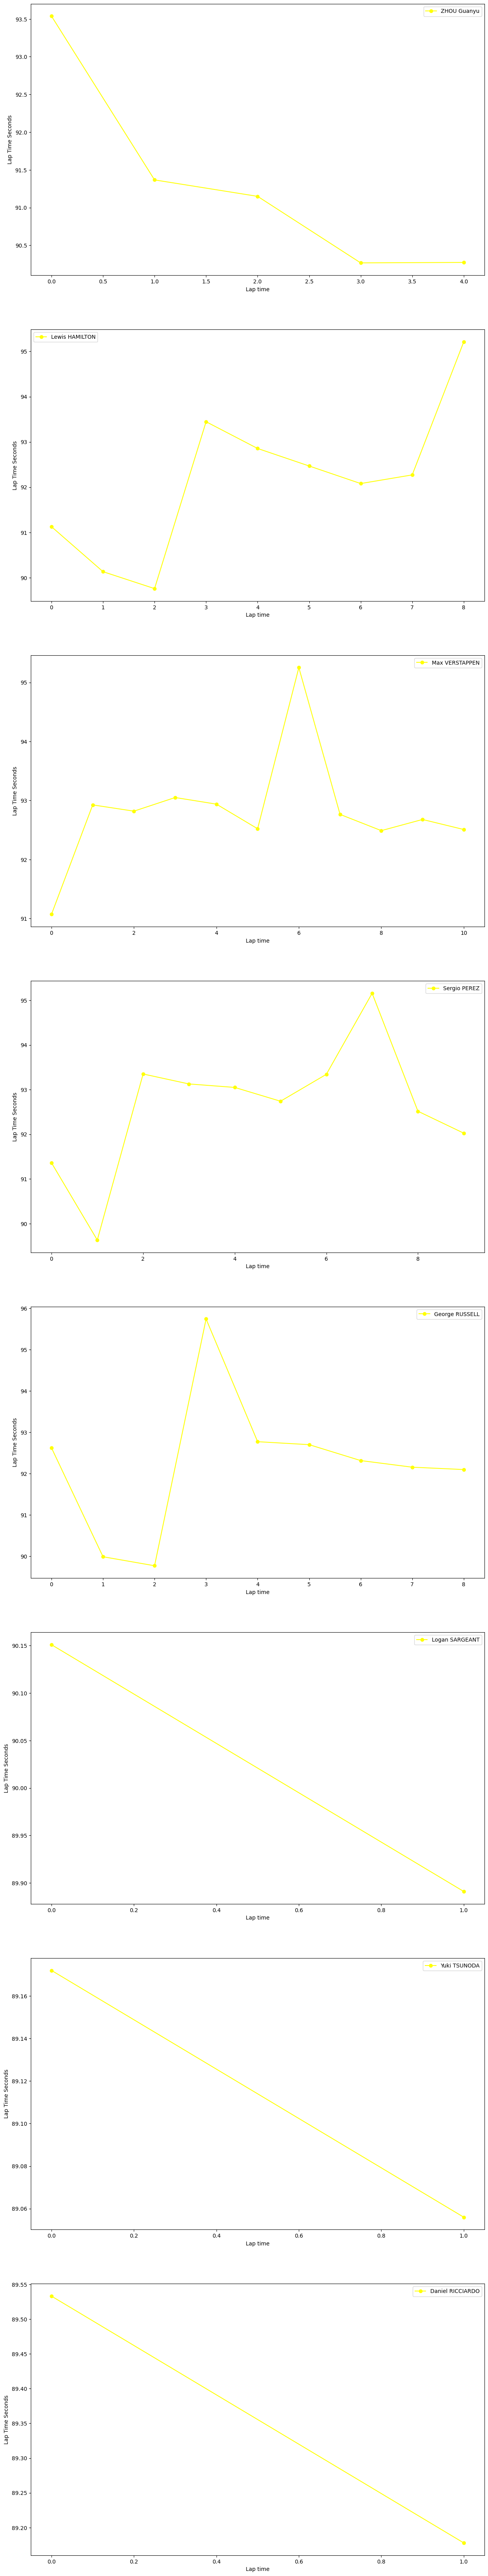

In [123]:
obtain_data_tyres(jointables2,"MEDIUM",False)

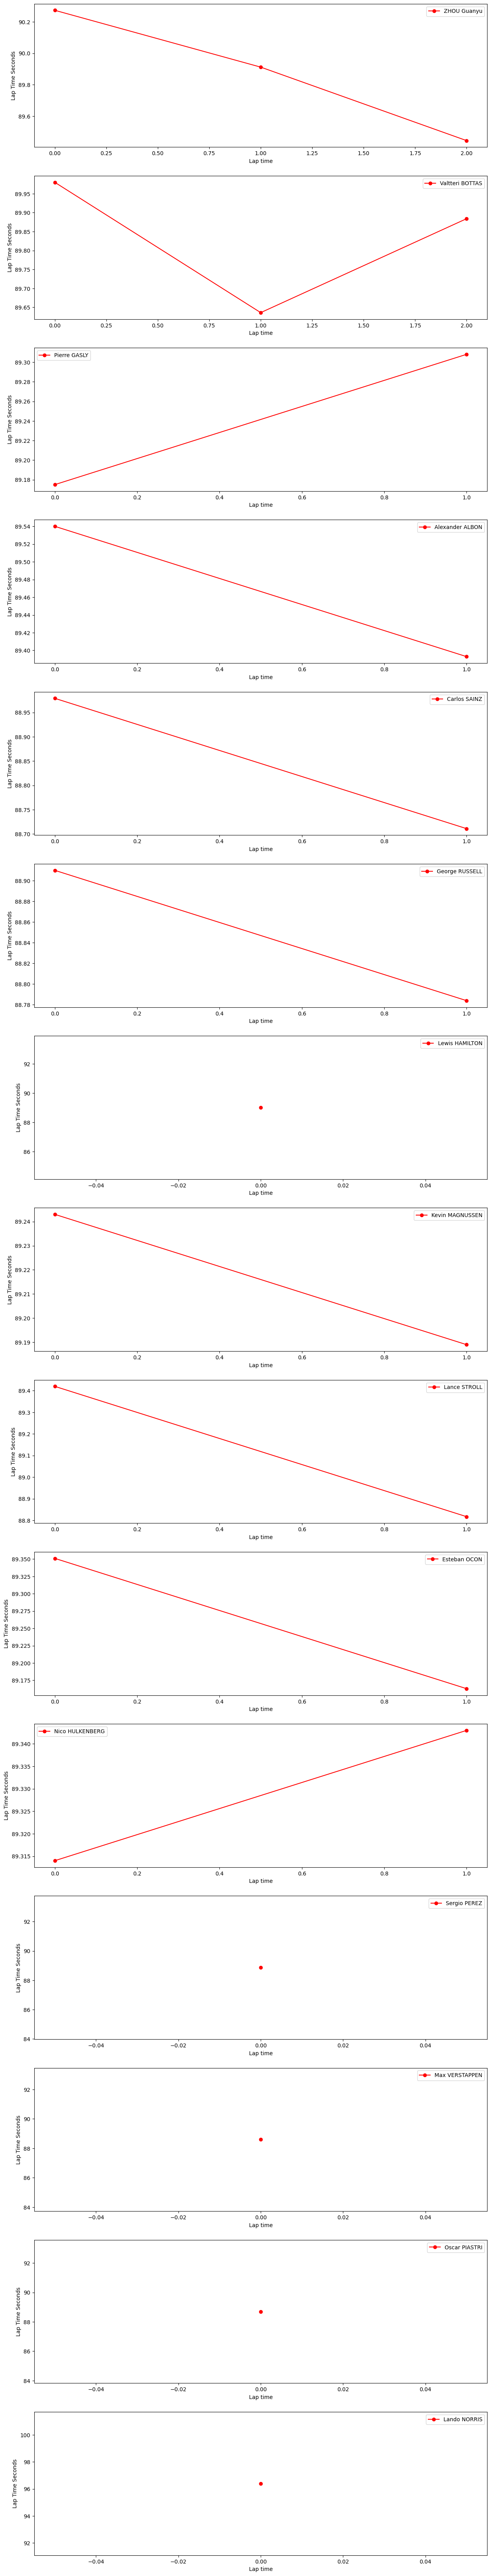

In [124]:
obtain_data_tyres(jointables2,"SOFT",False)

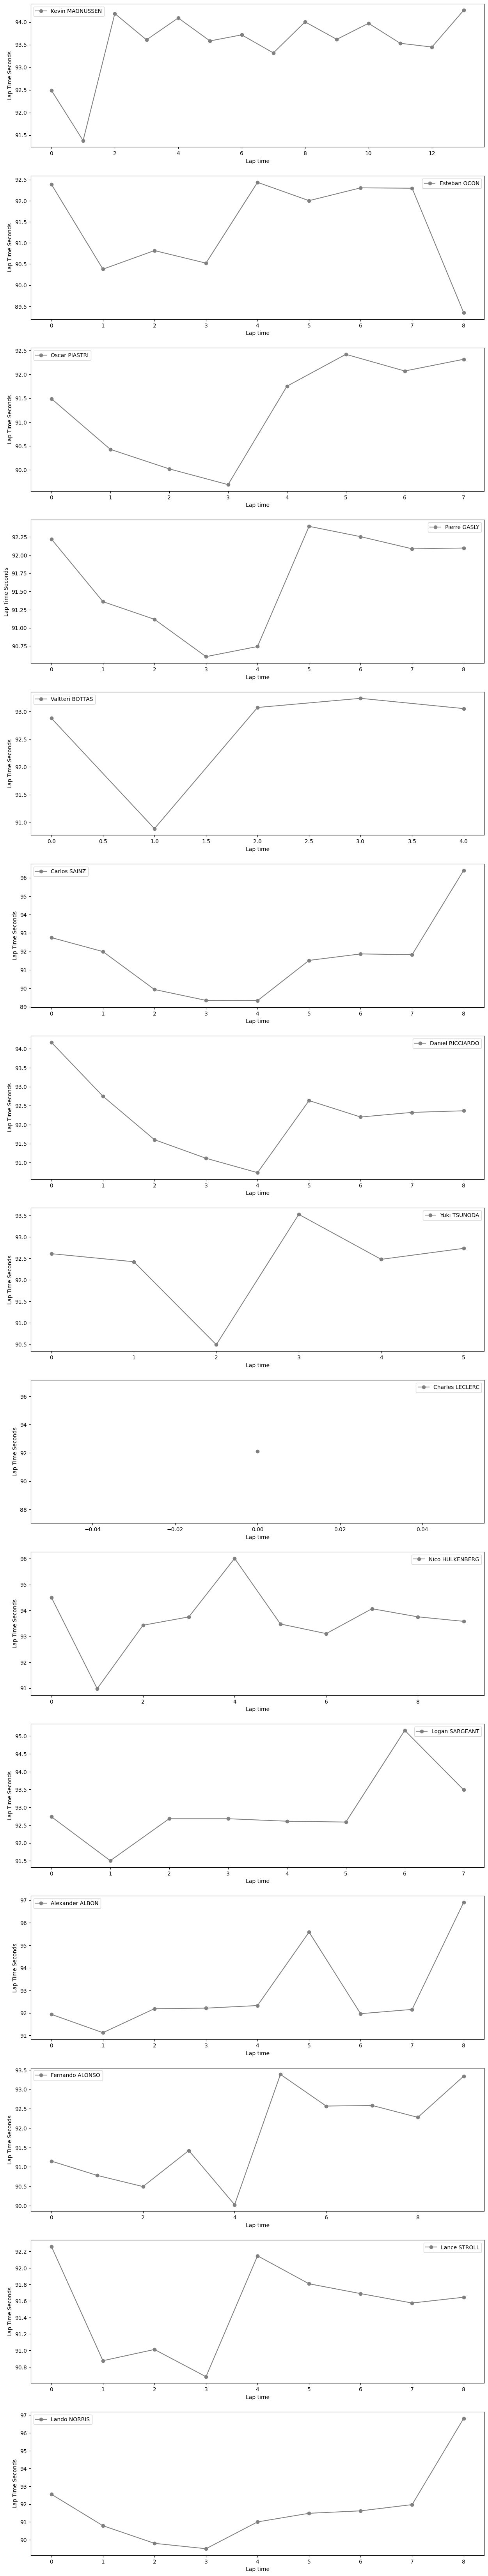

In [125]:
obtain_data_tyres(jointables2,"HARD",False)

In [126]:
# Source: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
def obtainchart(xvariable,yvariable,dataset):
    plt.figure(figsize=(12, 9))
    plots = sns.barplot(x=xvariable, y=yvariable, data=dataset,color='red')
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.3f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=8, xytext=(0, 7),
                       textcoords='offset points')
    plt.show()

### Top speed

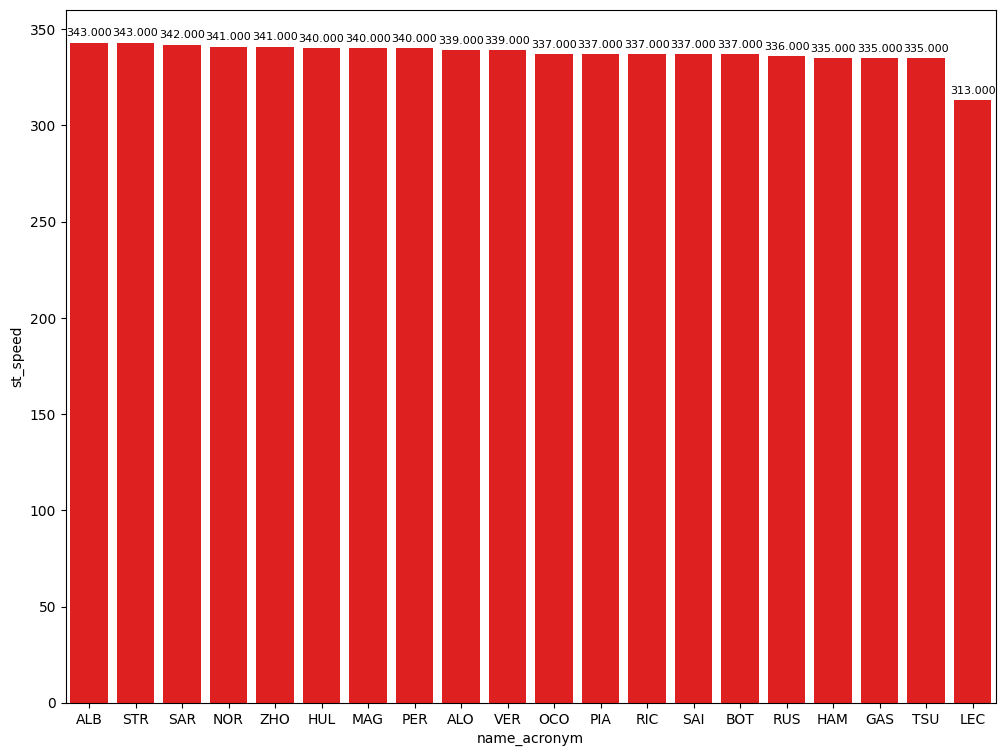

In [127]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
obtainchart("name_acronym","st_speed",top_speed)

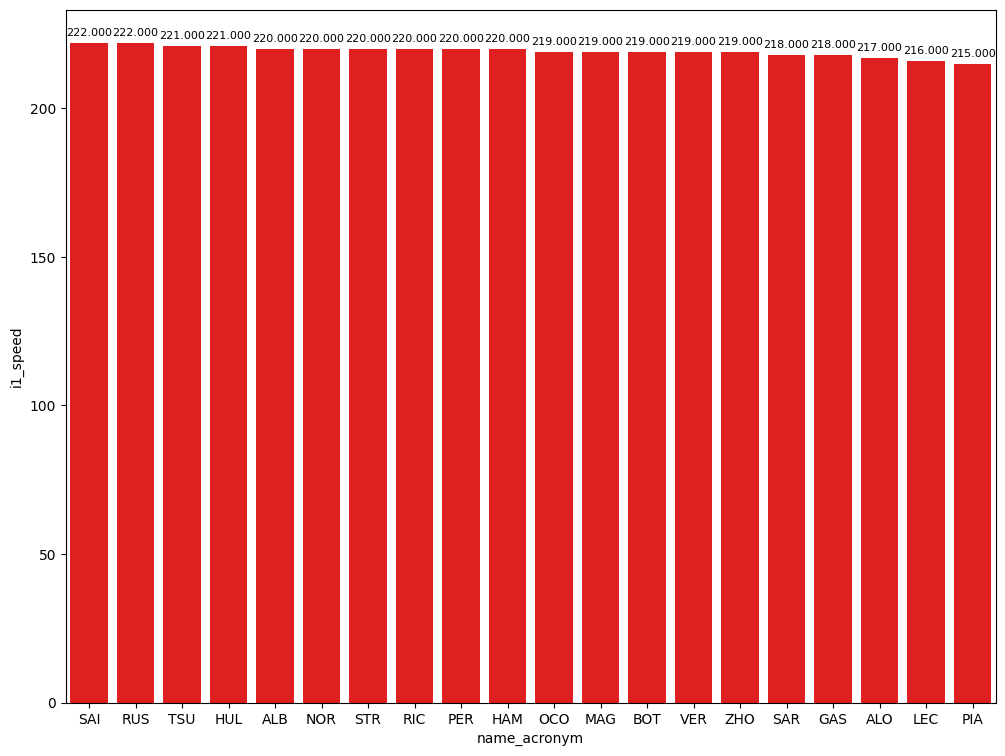

In [128]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
obtainchart("name_acronym","i1_speed",top_speed)

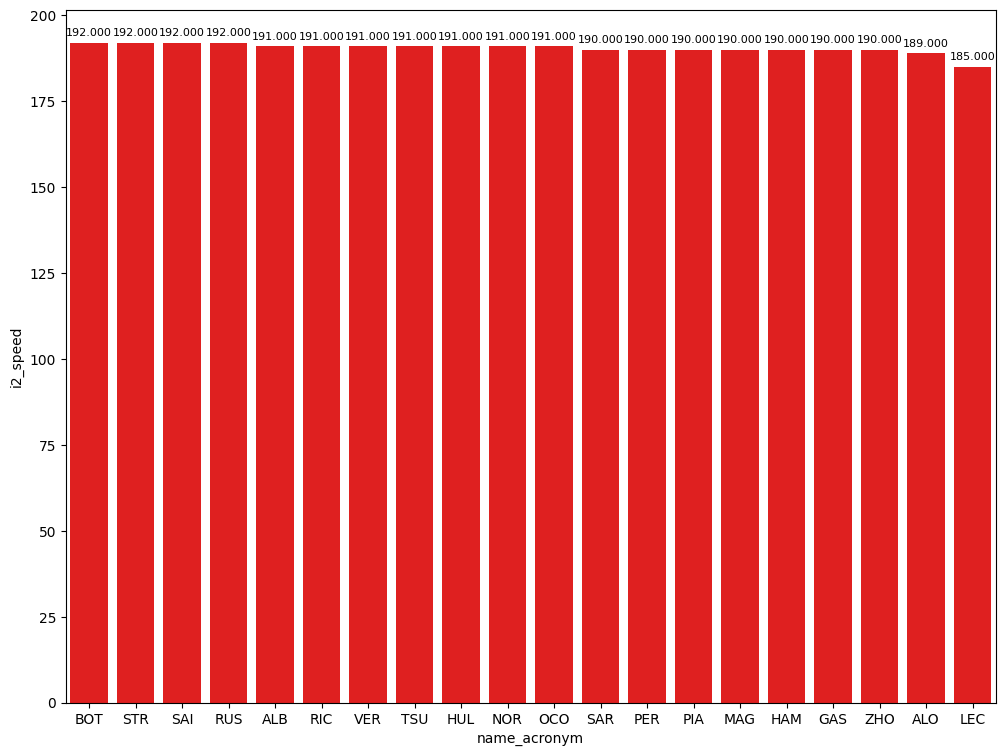

In [129]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound

In [130]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
212,Carlos SAINZ,HARD,29.814,34.156,25.361,89.331
408,Yuki TSUNODA,MEDIUM,30.010,33.803,25.243,89.056
397,Max VERSTAPPEN,SOFT,29.606,33.604,25.385,88.595


### Fastest lap

In [131]:
def obtain_fastest_lap(driver,dataset,newdataset):
    fastest_lap = dataset.query("driver_number == @driver").lap_duration.min()
    team_name = dataset.query("driver_number == @driver").head(1).team_name.to_string(index=False)
    #team_colour = dataset.query("driver_number == @driver").head(1).team_colour.to_string(index=False)
    name_acronym = dataset.query('driver_number == @driver').head(1).name_acronym.to_string(index=False)
    new_row = {'driver_number':driver,'fastest_lap':fastest_lap,'name_acronym': name_acronym, 'team_name':team_name}
    newdataset =pd.concat([newdataset, pd.DataFrame([new_row])], ignore_index=True)
    return newdataset

In [132]:
def obtain_deltas(dataset,array):
    fastest_lap = dataset.fastest_lap.min()
    for row in dataset.iterrows():
        lap = row[1][1]
        delta = lap-fastest_lap
        array.append(delta)
    return array

In [133]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =obtain_fastest_lap(driver,practiceCleaned,newdataset)

In [134]:
arr= obtain_deltas(newdataset,[])
newdataset.insert(3,'delta',arr)

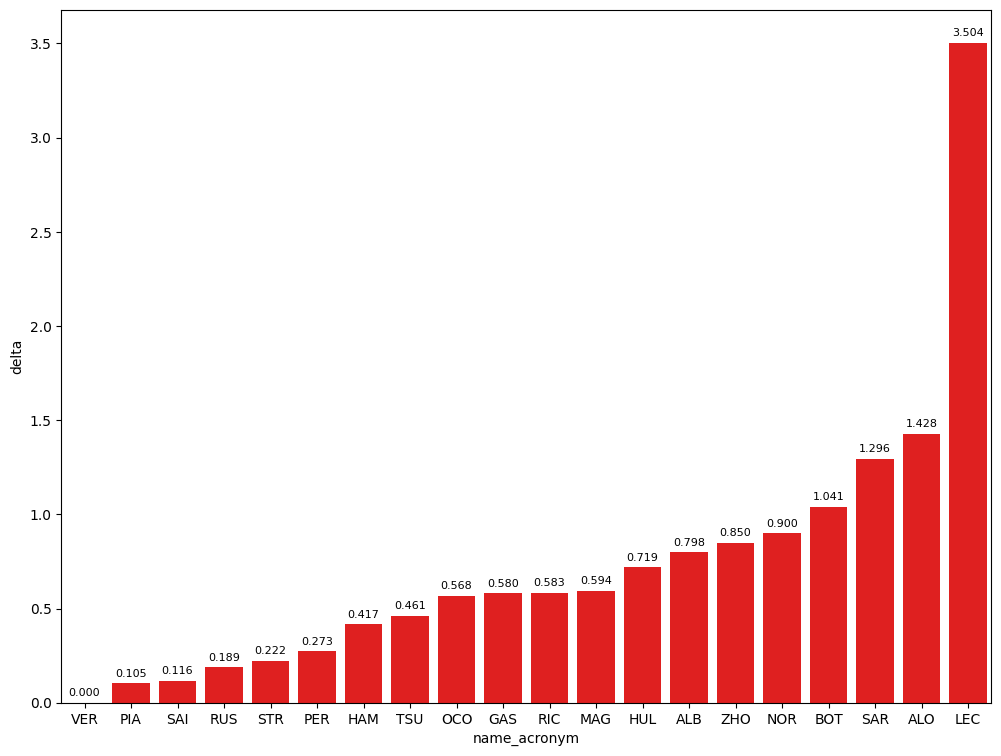

In [135]:
dt = newdataset.sort_values(ascending=True,by='delta')
obtainchart("name_acronym","delta",dt)

### Track dominance

In [136]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

,duration_sector_1,full_name,compound,lap_duration,lap_number
400,29.473,George RUSSELL,SOFT,88.784,23
353,29.575,Lewis HAMILTON,SOFT,89.012,20
397,29.606,Max VERSTAPPEN,SOFT,88.595,22
402,29.612,Carlos SAINZ,SOFT,88.711,21
406,29.729,Lando NORRIS,SOFT,96.398,18
403,29.746,Oscar PIASTRI,SOFT,88.700,21
328,29.748,Pierre GASLY,SOFT,89.175,20
413,29.791,Esteban OCON,SOFT,89.163,21
409,29.814,Lance STROLL,SOFT,88.817,22
350,29.861,Yuki TSUNODA,MEDIUM,89.172,19


In [137]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

,duration_sector_2,full_name,compound,lap_duration,lap_number
397,33.604,Max VERSTAPPEN,SOFT,88.595,22
406,33.706,Lando NORRIS,SOFT,96.398,18
420,33.802,Nico HULKENBERG,SOFT,89.343,23
408,33.803,Yuki TSUNODA,MEDIUM,89.056,22
403,33.858,Oscar PIASTRI,SOFT,88.700,21
378,33.900,Sergio PEREZ,SOFT,88.868,19
402,33.904,Carlos SAINZ,SOFT,88.711,21
409,33.916,Lance STROLL,SOFT,88.817,22
346,33.965,George RUSSELL,SOFT,88.910,20
329,33.969,Alexander ALBON,SOFT,89.540,17


In [138]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

,duration_sector_3,full_name,compound,lap_duration,lap_number
420,24.939,Nico HULKENBERG,SOFT,89.343,23
380,24.992,Alexander ALBON,SOFT,89.393,20
378,25.039,Sergio PEREZ,SOFT,88.868,19
409,25.087,Lance STROLL,SOFT,88.817,22
403,25.096,Oscar PIASTRI,SOFT,88.700,21
354,25.134,Kevin MAGNUSSEN,SOFT,89.243,21
371,25.145,Logan SARGEANT,MEDIUM,89.891,19
402,25.195,Carlos SAINZ,SOFT,88.711,21
404,25.219,ZHOU Guanyu,SOFT,89.445,21
360,25.222,Esteban OCON,HARD,89.351,18


In [139]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
SOFT,89.267115
MEDIUM,91.717913
HARD,92.084269


### Long laps

In [154]:
def getinfolonglaps(dataset,driver_number,team,lap_duration_min,lap_duration_max):
    dataset = dataset.query("is_pit_out_lap == False and driver_number == @driver_number and team_name == @team and lap_duration < @lap_duration_max and lap_duration > @lap_duration_min ")
    return dataset[['full_name','compound','date_start','lap_number','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

#### Red Bull Racing

In [151]:
stintInformation.query('driver_number == 1 or driver_number == 11')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
5,1234,9497,1,1,1,5,MEDIUM,0
7,1234,9497,1,11,1,5,MEDIUM,0
26,1234,9497,2,11,6,8,MEDIUM,4
32,1234,9497,2,1,6,18,MEDIUM,4
44,1234,9497,3,11,9,18,MEDIUM,7
62,1234,9497,3,1,19,21,SOFT,0
63,1234,9497,4,11,19,21,SOFT,0
77,1234,9497,5,11,22,24,MEDIUM,17
78,1234,9497,4,1,22,26,SOFT,3


In [157]:
getinfolonglaps(jointables2,1,'Red Bull Racing',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
32,Max VERSTAPPEN,MEDIUM,2024-05-03T16:33:32.677000+00:00,2,30.747,34.684,25.640,91.071
127,Max VERSTAPPEN,MEDIUM,2024-05-03T16:53:02.293000+00:00,7,31.654,35.126,26.145,92.925
143,Max VERSTAPPEN,MEDIUM,2024-05-03T16:54:35.355000+00:00,8,31.653,35.103,26.063,92.819
158,Max VERSTAPPEN,MEDIUM,2024-05-03T16:56:08.113000+00:00,9,31.672,35.319,26.059,93.050
171,Max VERSTAPPEN,MEDIUM,2024-05-03T16:57:42.711000+00:00,10,31.514,35.369,26.055,92.938
181,Max VERSTAPPEN,MEDIUM,2024-05-03T16:59:14.126000+00:00,11,31.529,35.102,25.890,92.521
205,Max VERSTAPPEN,MEDIUM,2024-05-03T17:02:21.908000+00:00,13,31.626,35.220,25.918,92.764
222,Max VERSTAPPEN,MEDIUM,2024-05-03T17:03:55.129000+00:00,14,31.503,35.184,25.802,92.489
239,Max VERSTAPPEN,MEDIUM,2024-05-03T17:05:27.160000+00:00,15,31.388,35.272,26.018,92.678
254,Max VERSTAPPEN,MEDIUM,2024-05-03T17:06:59.773000+00:00,16,31.257,35.295,25.956,92.508


In [158]:
getinfolonglaps(jointables2,11,'Red Bull Racing',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
34,Sergio PEREZ,MEDIUM,2024-05-03T16:33:37.127000+00:00,2,31.073,34.698,25.590,91.361
177,Sergio PEREZ,MEDIUM,2024-05-03T16:58:56.401000+00:00,9,31.701,35.498,26.151,93.350
187,Sergio PEREZ,MEDIUM,2024-05-03T17:00:29.750000+00:00,10,31.461,35.638,26.028,93.127
202,Sergio PEREZ,MEDIUM,2024-05-03T17:02:02.889000+00:00,11,31.613,35.424,26.012,93.049
218,Sergio PEREZ,MEDIUM,2024-05-03T17:03:36.051000+00:00,12,31.578,35.091,26.071,92.740
234,Sergio PEREZ,MEDIUM,2024-05-03T17:05:08.678000+00:00,13,31.665,35.401,26.276,93.342
264,Sergio PEREZ,MEDIUM,2024-05-03T17:08:17.168000+00:00,15,31.508,35.157,25.851,92.516
279,Sergio PEREZ,MEDIUM,2024-05-03T17:09:49.699000+00:00,16,31.458,34.777,25.790,92.025


#### Ferrari

In [160]:
stintInformation.query('driver_number == 16 or driver_number == 55')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
4,1234,9497,1,16,1,4,HARD,0
11,1234,9497,1,55,1,5,HARD,0
31,1234,9497,2,55,6,17,HARD,4
60,1234,9497,3,55,18,20,SOFT,0
72,1234,9497,4,55,21,25,SOFT,3


In [166]:
getinfolonglaps(jointables2,55,'Ferrari',90,98)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
25,Carlos SAINZ,HARD,2024-05-03T16:32:55.244000+00:00,2,31.148,35.477,26.128,92.753
43,Carlos SAINZ,HARD,2024-05-03T16:34:27.125000+00:00,3,30.964,35.151,25.879,91.994
248,Carlos SAINZ,HARD,2024-05-03T17:06:41.245000+00:00,13,30.613,34.954,25.949,91.516
263,Carlos SAINZ,HARD,2024-05-03T17:08:12.691000+00:00,14,30.629,35.249,25.988,91.866
278,Carlos SAINZ,HARD,2024-05-03T17:09:44.617000+00:00,15,30.695,35.060,26.070,91.825
289,Carlos SAINZ,HARD,2024-05-03T17:11:16.403000+00:00,16,30.574,35.069,30.759,96.402


#### McLaren

In [167]:
stintInformation.query('driver_number == 4 or driver_number == 81')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1234,9497,1,4,1,2,HARD,0
19,1234,9497,1,81,1,6,HARD,0
22,1234,9497,2,4,3,7,HARD,1
35,1234,9497,2,81,7,9,HARD,5
42,1234,9497,3,4,8,17,HARD,6
46,1234,9497,3,81,10,14,HARD,8
52,1234,9497,4,81,15,20,HARD,13
59,1234,9497,4,4,18,19,SOFT,0
67,1234,9497,5,4,20,22,HARD,16
73,1234,9497,5,81,21,25,SOFT,0


In [168]:
getinfolonglaps(jointables2,4,'McLaren',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
93,Lando NORRIS,HARD,2024-05-03T16:49:09.790000+00:00,3,31.385,35.093,26.077,92.555
125,Lando NORRIS,HARD,2024-05-03T16:52:50.600000+00:00,5,30.366,34.618,25.804,90.788
294,Lando NORRIS,HARD,2024-05-03T17:12:09.131000+00:00,12,30.549,34.796,25.656,91.001
302,Lando NORRIS,HARD,2024-05-03T17:13:40.162000+00:00,13,30.779,34.907,25.800,91.486
310,Lando NORRIS,HARD,2024-05-03T17:15:11.897000+00:00,14,30.891,34.977,25.755,91.623
316,Lando NORRIS,HARD,2024-05-03T17:16:43.266000+00:00,15,30.920,35.082,25.972,91.974


In [169]:
getinfolonglaps(jointables2,81,'McLaren',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
20,Oscar PIASTRI,HARD,2024-05-03T16:32:03.324000+00:00,2,30.837,34.915,25.739,91.491
92,Oscar PIASTRI,HARD,2024-05-03T16:49:01.946000+00:00,7,30.422,34.389,25.620,90.431
214,Oscar PIASTRI,HARD,2024-05-03T17:03:20.897000+00:00,10,30.182,34.407,25.433,90.022
293,Oscar PIASTRI,HARD,2024-05-03T17:12:05.728000+00:00,15,30.968,34.937,25.847,91.752
301,Oscar PIASTRI,HARD,2024-05-03T17:13:37.382000+00:00,16,31.331,35.081,26.007,92.419
309,Oscar PIASTRI,HARD,2024-05-03T17:15:09.739000+00:00,17,31.231,34.787,26.052,92.070
315,Oscar PIASTRI,HARD,2024-05-03T17:16:41.801000+00:00,18,31.093,35.194,26.028,92.315


#### Mercedes

In [172]:
stintInformation.query('driver_number == 44 or driver_number == 63')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
10,1234,9497,1,44,1,5,MEDIUM,0
12,1234,9497,1,63,1,5,MEDIUM,0
27,1234,9497,2,44,6,8,MEDIUM,4
29,1234,9497,2,63,6,10,MEDIUM,4
43,1234,9497,3,44,9,11,MEDIUM,7
48,1234,9497,3,63,11,19,MEDIUM,9
51,1234,9497,4,44,12,19,MEDIUM,10
68,1234,9497,5,44,20,22,SOFT,0
69,1234,9497,4,63,20,22,SOFT,0
80,1234,9497,6,44,23,25,MEDIUM,18


In [170]:
getinfolonglaps(jointables2,44,'Mercedes',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
24,Lewis HAMILTON,MEDIUM,2024-05-03T16:32:46.629000+00:00,2,30.205,35.255,25.667,91.127
89,Lewis HAMILTON,MEDIUM,2024-05-03T16:48:40.981000+00:00,6,29.935,34.714,25.484,90.133
227,Lewis HAMILTON,MEDIUM,2024-05-03T17:04:28.013000+00:00,12,31.485,35.689,26.272,93.446
243,Lewis HAMILTON,MEDIUM,2024-05-03T17:06:01.455000+00:00,13,31.233,35.496,26.126,92.855
259,Lewis HAMILTON,MEDIUM,2024-05-03T17:07:34.285000+00:00,14,31.163,35.387,25.918,92.468
273,Lewis HAMILTON,MEDIUM,2024-05-03T17:09:06.732000+00:00,15,30.760,35.260,26.060,92.080
284,Lewis HAMILTON,MEDIUM,2024-05-03T17:10:38.817000+00:00,16,30.949,35.379,25.943,92.271


In [171]:
getinfolonglaps(jointables2,63,'Mercedes',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
37,George RUSSELL,MEDIUM,2024-05-03T16:33:44.497000+00:00,2,31.644,35.102,25.875,92.621
219,George RUSSELL,MEDIUM,2024-05-03T17:03:40.582000+00:00,12,30.858,35.695,26.217,92.770
235,George RUSSELL,MEDIUM,2024-05-03T17:05:13.378000+00:00,13,30.940,35.618,26.140,92.698
250,George RUSSELL,MEDIUM,2024-05-03T17:06:46.074000+00:00,14,30.958,35.585,25.770,92.313
265,George RUSSELL,MEDIUM,2024-05-03T17:08:18.350000+00:00,15,31.136,35.302,25.715,92.153
291,George RUSSELL,MEDIUM,2024-05-03T17:11:30.393000+00:00,17,30.778,35.266,26.052,92.096


#### Aston Martin

In [173]:
stintInformation.query('driver_number == 14 or driver_number == 18')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
1,1234,9497,1,14,1,2,MEDIUM,0
2,1234,9497,1,18,1,2,MEDIUM,0
20,1234,9497,2,14,3,3,HARD,0
21,1234,9497,2,18,3,3,HARD,0
24,1234,9497,3,14,4,10,HARD,0
25,1234,9497,3,18,4,18,HARD,0
49,1234,9497,4,14,11,23,HARD,7
64,1234,9497,4,18,19,26,SOFT,0


In [175]:
getinfolonglaps(jointables2,14,'Aston Martin',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
88,Fernando ALONSO,HARD,2024-05-03T16:48:19.719000+00:00,4,30.924,34.544,25.680,91.148
121,Fernando ALONSO,HARD,2024-05-03T16:52:04.735000+00:00,6,30.578,34.631,25.570,90.779
154,Fernando ALONSO,HARD,2024-05-03T16:55:47.668000+00:00,8,30.394,34.476,25.621,90.491
299,Fernando ALONSO,HARD,2024-05-03T17:13:12.570000+00:00,11,30.770,34.906,25.746,91.422
327,Fernando ALONSO,HARD,2024-05-03T17:18:52.307000+00:00,14,30.301,34.369,25.353,90.023
358,Fernando ALONSO,HARD,2024-05-03T17:22:40.164000+00:00,16,31.546,35.806,26.035,93.387
373,Fernando ALONSO,HARD,2024-05-03T17:24:13.476000+00:00,17,31.099,35.475,25.995,92.569
385,Fernando ALONSO,HARD,2024-05-03T17:25:46.061000+00:00,18,30.945,35.365,26.276,92.586
399,Fernando ALONSO,HARD,2024-05-03T17:27:18.707000+00:00,19,30.929,35.381,25.968,92.278
414,Fernando ALONSO,HARD,2024-05-03T17:28:51.033000+00:00,20,31.582,35.680,26.078,93.340


In [176]:
getinfolonglaps(jointables2,18,'Aston Martin',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
91,Lance STROLL,HARD,2024-05-03T16:48:54.743000+00:00,4,31.183,35.059,26.019,92.261
122,Lance STROLL,HARD,2024-05-03T16:52:12.563000+00:00,6,30.764,34.710,25.402,90.876
156,Lance STROLL,HARD,2024-05-03T16:56:02.091000+00:00,8,30.955,34.507,25.550,91.012
184,Lance STROLL,HARD,2024-05-03T16:59:51.560000+00:00,10,30.467,34.794,25.421,90.682
213,Lance STROLL,HARD,2024-05-03T17:03:14.516000+00:00,12,31.079,35.188,25.880,92.147
230,Lance STROLL,HARD,2024-05-03T17:04:46.663000+00:00,13,30.998,35.055,25.755,91.808
245,Lance STROLL,HARD,2024-05-03T17:06:18.592000+00:00,14,30.974,35.068,25.647,91.689
261,Lance STROLL,HARD,2024-05-03T17:07:50.099000+00:00,15,30.866,35.115,25.594,91.575
275,Lance STROLL,HARD,2024-05-03T17:09:21.742000+00:00,16,30.817,35.132,25.696,91.645


#### RB

In [177]:
stintInformation.query('driver_number == 3 or driver_number == 22')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
6,1234,9497,1,3,1,5,HARD,0
8,1234,9497,1,22,1,5,HARD,0
30,1234,9497,2,22,6,11,HARD,4
33,1234,9497,2,3,6,19,HARD,4
50,1234,9497,3,22,12,16,HARD,0
57,1234,9497,4,22,17,17,HARD,15
58,1234,9497,5,22,18,18,HARD,0
65,1234,9497,6,22,19,26,MEDIUM,0
66,1234,9497,3,3,20,20,HARD,18
75,1234,9497,4,3,21,28,MEDIUM,0


In [178]:
getinfolonglaps(jointables2,3,'RB',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
26,Daniel RICCIARDO,HARD,2024-05-03T16:32:57.799000+00:00,2,32.209,35.758,26.200,94.167
44,Daniel RICCIARDO,HARD,2024-05-03T16:34:31.830000+00:00,3,31.504,35.352,25.893,92.749
94,Daniel RICCIARDO,HARD,2024-05-03T16:49:13.901000+00:00,6,31.062,34.801,25.741,91.604
129,Daniel RICCIARDO,HARD,2024-05-03T16:53:10.030000+00:00,8,30.790,34.554,25.771,91.115
164,Daniel RICCIARDO,HARD,2024-05-03T16:57:04.680000+00:00,10,30.554,34.495,25.687,90.736
228,Daniel RICCIARDO,HARD,2024-05-03T17:04:30.669000+00:00,14,31.286,35.439,25.909,92.634
244,Daniel RICCIARDO,HARD,2024-05-03T17:06:03.143000+00:00,15,31.426,35.051,25.724,92.201
260,Daniel RICCIARDO,HARD,2024-05-03T17:07:35.336000+00:00,16,31.353,35.215,25.755,92.323
274,Daniel RICCIARDO,HARD,2024-05-03T17:09:07.725000+00:00,17,31.293,35.226,25.846,92.365


In [179]:
getinfolonglaps(jointables2,22,'RB',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
27,Yuki TSUNODA,HARD,2024-05-03T16:33:11.991000+00:00,2,31.170,35.656,25.788,92.614
85,Yuki TSUNODA,HARD,2024-05-03T16:47:57.572000+00:00,6,32.202,34.644,25.580,92.426
119,Yuki TSUNODA,HARD,2024-05-03T16:51:46.082000+00:00,8,30.482,34.378,25.632,90.492
211,Yuki TSUNODA,HARD,2024-05-03T17:02:49.852000+00:00,12,32.215,35.161,26.155,93.531
226,Yuki TSUNODA,HARD,2024-05-03T17:04:23.381000+00:00,13,31.106,35.233,26.143,92.482
242,Yuki TSUNODA,HARD,2024-05-03T17:05:55.792000+00:00,14,31.444,35.237,26.057,92.738


#### Williams

In [180]:
stintInformation.query('driver_number == 2 or driver_number == 23')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
3,1234,9497,1,2,1,3,HARD,0
15,1234,9497,1,23,1,6,HARD,0
23,1234,9497,2,2,4,7,HARD,2
36,1234,9497,2,23,7,14,HARD,5
41,1234,9497,3,2,8,15,HARD,6
53,1234,9497,3,23,15,22,SOFT,0
56,1234,9497,4,2,16,21,MEDIUM,0
76,1234,9497,5,2,22,24,MEDIUM,6
79,1234,9497,4,23,23,25,HARD,13


In [181]:
getinfolonglaps(jointables2,2,'Williams',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
84,Logan SARGEANT,HARD,2024-05-03T16:47:48.857000+00:00,4,31.477,35.512,25.747,92.736
96,Logan SARGEANT,HARD,2024-05-03T16:49:21.612000+00:00,5,31.313,34.647,25.542,91.502
149,Logan SARGEANT,HARD,2024-05-03T16:55:02.245000+00:00,8,31.747,34.967,25.966,92.680
160,Logan SARGEANT,HARD,2024-05-03T16:56:34.834000+00:00,9,31.790,35.018,25.872,92.680
173,Logan SARGEANT,HARD,2024-05-03T16:58:07.597000+00:00,10,31.672,35.141,25.797,92.610
183,Logan SARGEANT,HARD,2024-05-03T16:59:40.154000+00:00,11,31.568,35.240,25.779,92.587
210,Logan SARGEANT,HARD,2024-05-03T17:02:47.896000+00:00,13,32.678,34.983,25.831,93.492
323,Logan SARGEANT,MEDIUM,2024-05-03T17:18:10.359000+00:00,16,30.525,34.425,25.201,90.151


In [182]:
getinfolonglaps(jointables2,23,'Williams',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
86,Alexander ALBON,HARD,2024-05-03T16:48:03.488000+00:00,2,31.500,34.948,25.489,91.937
115,Alexander ALBON,HARD,2024-05-03T16:51:30.611000+00:00,4,31.237,34.531,25.356,91.124
165,Alexander ALBON,HARD,2024-05-03T16:57:12.709000+00:00,7,31.513,35.089,25.588,92.190
176,Alexander ALBON,HARD,2024-05-03T16:58:44.889000+00:00,8,31.446,34.987,25.780,92.213
185,Alexander ALBON,HARD,2024-05-03T17:00:17.085000+00:00,9,31.526,35.033,25.770,92.329
217,Alexander ALBON,HARD,2024-05-03T17:03:25.089000+00:00,11,31.315,34.816,25.837,91.968
233,Alexander ALBON,HARD,2024-05-03T17:04:57.066000+00:00,12,31.305,35.188,25.664,92.157


#### Kick Sauber

In [183]:
stintInformation.query('driver_number == 24 or driver_number == 77')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
16,1234,9497,1,24,1,6,MEDIUM,0
18,1234,9497,1,77,1,6,HARD,0
34,1234,9497,2,77,7,9,HARD,0
37,1234,9497,2,24,7,15,MEDIUM,0
45,1234,9497,3,77,10,14,HARD,0
54,1234,9497,4,77,15,24,SOFT,0
55,1234,9497,3,24,15,25,SOFT,0


In [184]:
getinfolonglaps(jointables2,24,'Kick Sauber',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
22,ZHOU Guanyu,MEDIUM,2024-05-03T16:32:18.563000+00:00,2,32.070,35.519,25.949,93.538
95,ZHOU Guanyu,MEDIUM,2024-05-03T16:49:17.744000+00:00,7,30.851,34.781,25.735,91.367
131,ZHOU Guanyu,MEDIUM,2024-05-03T16:53:14.549000+00:00,9,30.852,34.605,25.692,91.149
179,ZHOU Guanyu,MEDIUM,2024-05-03T16:59:03.346000+00:00,12,30.329,34.500,25.438,90.267
311,ZHOU Guanyu,MEDIUM,2024-05-03T17:15:43.512000+00:00,15,30.485,34.465,25.323,90.273
312,ZHOU Guanyu,SOFT,2024-05-03T17:15:43.512000+00:00,15,30.485,34.465,25.323,90.273


In [185]:
getinfolonglaps(jointables2,77,'Kick Sauber',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
23,Valtteri BOTTAS,HARD,2024-05-03T16:32:24.441000+00:00,2,31.411,35.484,25.985,92.880
133,Valtteri BOTTAS,HARD,2024-05-03T16:53:23.825000+00:00,7,30.654,34.517,25.716,90.887
221,Valtteri BOTTAS,HARD,2024-05-03T17:03:49.160000+00:00,10,31.338,35.425,26.311,93.074
238,Valtteri BOTTAS,HARD,2024-05-03T17:05:22.188000+00:00,11,31.646,35.444,26.149,93.239
253,Valtteri BOTTAS,HARD,2024-05-03T17:06:55.502000+00:00,12,31.553,35.445,26.056,93.054


#### Haas

In [186]:
stintInformation.query('driver_number == 20 or driver_number == 27')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
9,1234,9497,1,27,1,5,HARD,0
14,1234,9497,1,20,1,6,HARD,0
28,1234,9497,2,27,6,9,HARD,0
40,1234,9497,2,20,7,20,HARD,5
47,1234,9497,3,27,10,19,HARD,0
70,1234,9497,4,27,20,26,SOFT,0
74,1234,9497,3,20,21,27,SOFT,0


In [190]:
getinfolonglaps(jointables2,20,'Haas F1 Team',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
16,Kevin MAGNUSSEN,HARD,2024-05-03T16:31:43.853000+00:00,2,31.631,35.176,25.684,92.491
28,Kevin MAGNUSSEN,HARD,2024-05-03T16:33:16.315000+00:00,3,30.766,35.004,25.609,91.379
116,Kevin MAGNUSSEN,HARD,2024-05-03T16:51:37.552000+00:00,7,32.210,35.583,26.395,94.188
130,Kevin MAGNUSSEN,HARD,2024-05-03T16:53:11.658000+00:00,8,31.924,35.438,26.245,93.607
146,Kevin MAGNUSSEN,HARD,2024-05-03T16:54:45.283000+00:00,9,32.113,35.759,26.219,94.091
159,Kevin MAGNUSSEN,HARD,2024-05-03T16:56:19.334000+00:00,10,31.816,35.468,26.299,93.583
172,Kevin MAGNUSSEN,HARD,2024-05-03T16:57:52.889000+00:00,11,31.706,35.663,26.348,93.717
182,Kevin MAGNUSSEN,HARD,2024-05-03T16:59:26.605000+00:00,12,31.526,35.655,26.137,93.318
193,Kevin MAGNUSSEN,HARD,2024-05-03T17:00:59.921000+00:00,13,31.840,35.673,26.491,94.004
206,Kevin MAGNUSSEN,HARD,2024-05-03T17:02:34.003000+00:00,14,31.833,35.544,26.241,93.618


In [191]:
getinfolonglaps(jointables2,27,'Haas F1 Team',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
38,Nico HULKENBERG,HARD,2024-05-03T16:33:46.118000+00:00,2,32.403,36.371,25.728,94.502
123,Nico HULKENBERG,HARD,2024-05-03T16:52:28.777000+00:00,6,30.700,34.710,25.572,90.982
215,Nico HULKENBERG,HARD,2024-05-03T17:03:21.692000+00:00,10,31.884,35.464,26.081,93.429
232,Nico HULKENBERG,HARD,2024-05-03T17:04:56.162000+00:00,11,31.690,35.709,26.351,93.750
262,Nico HULKENBERG,HARD,2024-05-03T17:08:04.974000+00:00,13,31.679,35.653,26.145,93.477
277,Nico HULKENBERG,HARD,2024-05-03T17:09:38.427000+00:00,14,31.795,35.359,25.952,93.106
287,Nico HULKENBERG,HARD,2024-05-03T17:11:11.448000+00:00,15,32.147,35.812,26.107,94.066
296,Nico HULKENBERG,HARD,2024-05-03T17:12:45.552000+00:00,16,31.938,35.594,26.221,93.753
305,Nico HULKENBERG,HARD,2024-05-03T17:14:19.227000+00:00,17,31.814,35.650,26.115,93.579


#### Alpine

In [192]:
stintInformation.query('driver_number == 10 or driver_number == 31')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
13,1234,9497,1,10,1,6,HARD,0
17,1234,9497,1,31,1,6,HARD,0
38,1234,9497,2,31,7,18,HARD,5
39,1234,9497,2,10,7,19,HARD,5
61,1234,9497,3,31,18,24,SOFT,0
71,1234,9497,3,10,20,28,SOFT,0


In [193]:
getinfolonglaps(jointables2,10,'Alpine',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
21,Pierre GASLY,HARD,2024-05-03T16:32:08.594000+00:00,2,30.885,35.517,25.818,92.220
97,Pierre GASLY,HARD,2024-05-03T16:49:25.904000+00:00,7,30.632,34.906,25.822,91.360
128,Pierre GASLY,HARD,2024-05-03T16:53:05.839000+00:00,9,30.401,34.893,25.823,91.117
161,Pierre GASLY,HARD,2024-05-03T16:56:45.655000+00:00,11,30.049,34.552,26.003,90.604
189,Pierre GASLY,HARD,2024-05-03T17:00:39.131000+00:00,13,30.173,34.902,25.668,90.743
204,Pierre GASLY,HARD,2024-05-03T17:02:09.922000+00:00,14,30.878,35.407,26.110,92.395
220,Pierre GASLY,HARD,2024-05-03T17:03:42.326000+00:00,15,30.911,35.396,25.946,92.253
236,Pierre GASLY,HARD,2024-05-03T17:05:14.553000+00:00,16,31.020,35.290,25.776,92.086
251,Pierre GASLY,HARD,2024-05-03T17:06:46.663000+00:00,17,31.093,35.442,25.562,92.097


In [194]:
getinfolonglaps(jointables2,31,'Alpine',90,95)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
19,Esteban OCON,HARD,2024-05-03T16:31:54.601000+00:00,2,31.235,35.406,25.746,92.387
138,Esteban OCON,HARD,2024-05-03T16:53:41.306000+00:00,7,30.246,34.594,25.539,90.379
169,Esteban OCON,HARD,2024-05-03T16:57:28.283000+00:00,9,30.491,34.739,25.589,90.819
194,Esteban OCON,HARD,2024-05-03T17:01:10.915000+00:00,11,30.280,34.660,25.582,90.522
207,Esteban OCON,HARD,2024-05-03T17:02:41.375000+00:00,12,31.016,35.437,25.981,92.434
224,Esteban OCON,HARD,2024-05-03T17:04:13.833000+00:00,13,30.845,35.275,25.880,92.000
241,Esteban OCON,HARD,2024-05-03T17:05:45.872000+00:00,14,30.968,35.380,25.955,92.303
257,Esteban OCON,HARD,2024-05-03T17:07:18.158000+00:00,15,31.051,35.260,25.983,92.294
